###Please finish the sections of the notebook labeled 'To Do.'

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
np.seterr(divide='ignore', invalid='ignore')

def compute_D(image, x1, x2, p):
    return np.sum((image[x1[0]-p: x1[0]+p, x1[1]-p:x1[1]+p] - image[x2[0]-p:x2[0]+p, x2[1]-p:x2[1]+p]) ** 2)

def compute_V(image, x, neighbors, p):
    D_values = [compute_D(image, x, np.array(x) + np.array(n), p) for n in neighbors]
    return np.mean(D_values)

def mind_descriptor(image, p, radius=4):
    h, w = image.shape
    neighbors = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    mind = np.zeros((h, w, (2*r+1)**2))

    for y in range(radius + p, h - radius - p):
        for x in range(radius + p, w - radius - p):
            V = compute_V(image, [y, x], neighbors, p)
            ind = 0
            for rx in range(-r, r+1):
                for ry in range(-r, r+1):
                  D_p = compute_D(image, [y, x],[y + ry, x + rx], p)

                  mind[y, x, ind] = np.exp(-min(D_p / V, 100))
                  ind += 1

            mind[y, x] /= (np.max(mind[y, x])+0.0001)

    return mind

image1 = cv2.imread('MRI.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('PET.png', cv2.IMREAD_GRAYSCALE)

p = 2
r = 1

rotated = transform.rotate(image2, 30)
mind1 = mind_descriptor(image1, p, r)
mind2_org = mind_descriptor(image2, p, r)





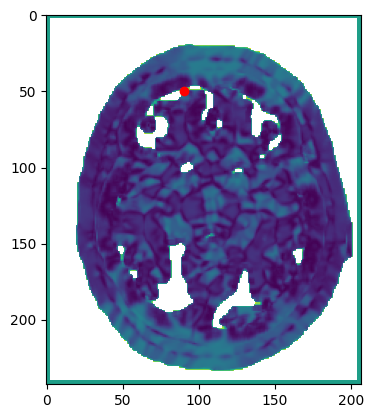

In [36]:
y0 = 90
x0 = 50

diff = np.sum((mind1[y0, x0]-mind2_org)**2, -1)
plt.imshow(diff)
plt.scatter(y0, x0, c='r')

In [38]:
mind2 = transform.rotate(mind2_org, 30)

<ipython-input-51-65fab4411d02>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-51-65fab4411d02>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


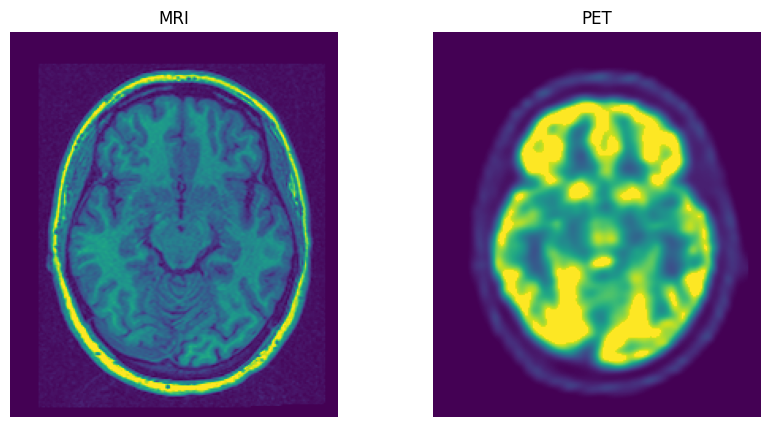

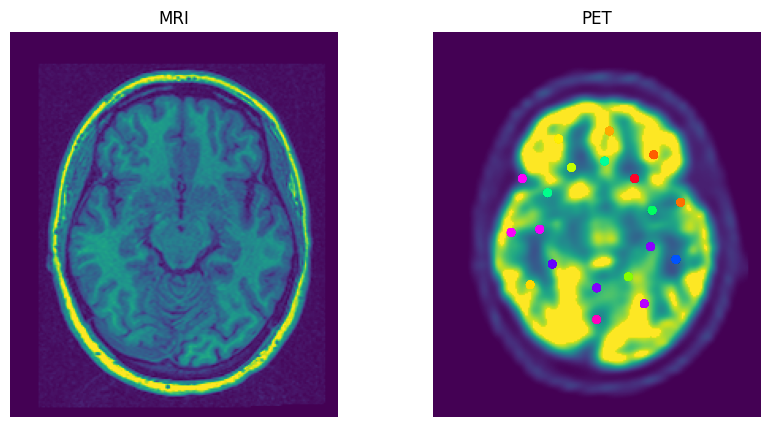

[[-22.5 -22.5 -22.5 -22.5 -16.5 -22.5 -16.5 -22.5 -22.5 -22.5 -22.5 -22.5
  -12.5 -22.5 -22.5 -22.5 -22.5 -22.5 -22.5 -22.5]
 [ 30.5 -10.5   1.5  22.5 -16.5  13.5  37.5 -22.5  16.5  12.5  10.5  49.5
   54.5  -4.5  -2.5 -22.5 -22.5 -13.5 -22.5 -22.5]]


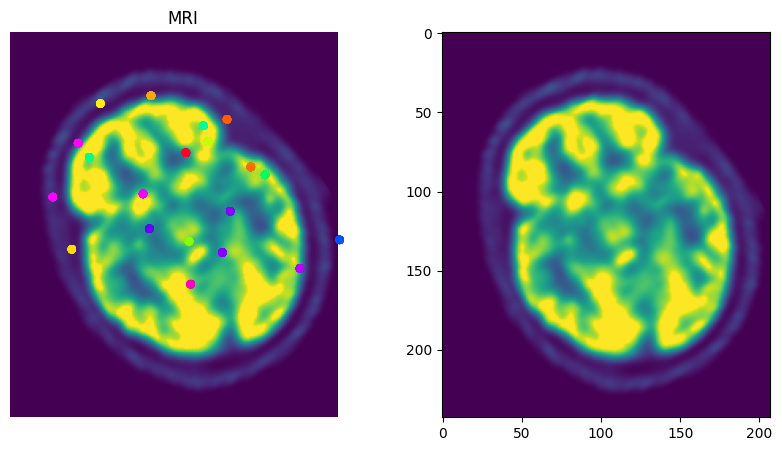

In [51]:
from skimage import io, transform

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(image1)
plt.title("MRI")
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(image2)
plt.title("PET")

fig, axs = plt.subplots(1,12, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(image1)
plt.title("MRI")
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(image2)
plt.title("PET")

X = []
W = image1.shape[0]
H = image1.shape[1]
n_points = 20
for r in range(2, 4):
  for tta in range(n_points//2):
    X.append([W/2+20*r*np.cos(tta*0.6), H/2+18*r*np.sin(tta*0.6)])

X = np.array(X).astype(int).T

colors = np.random.rand(n_points)
for i in range(X.shape[1]):
  plt.scatter(X[1], X[0], marker='o', facecolors='none',lw=0.1,c=colors,cmap="gist_rainbow")
plt.show()

Y = np.zeros(X.shape)
k = 45
for i in range(X.shape[1]):
  diff = np.sum((mind1[X[1, i], X[0, i]]-mind2)**2, -1)
  M = diff[X[1, i]-k:X[1, i]+k+1,  X[0, i]-k:X[0, i]+k+1]
  idx = np.unravel_index(M.argmin(), M.shape)

  Y[0, i] = X[0, i] + idx[0] -k/2
  Y[1, i] = X[1, i] + idx[1] -k/2

print(Y-X)
Xc = X - np.mean(X, axis=1, keepdims=True)
Yc = Y - np.mean(Y, axis=1, keepdims=True)
W, S, Vt = np.linalg.svd(Y @ X.T, full_matrices=False)
R = W @ Vt
#t = np.mean(Y, axis=1) - R @ np.mean(X, axis=1)
tta_rotate = np.arccos(R[0, 0])*180/np.pi

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(rotated)

for i in range(Y.shape[1]):
  plt.scatter(Y[1], Y[0], marker='o', facecolors='none',lw=0.1,c=colors,cmap="gist_rainbow")
plt.title("MRI")

plt.subplot(1, 2, 2)
plt.imshow(transform.rotate(rotated, -tta_rotate))

In [128]:
A = np.ones([2, 2])
print(np.arccos(1/2))

1.0471975511965979


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install voxelmorph, which will also install dependencies: neurite and pystrum
!pip install voxelmorph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystrum: filename=pystrum-0.4-py3-none-any.whl size=19534 sha256=6388a7a94a127ffb329881c52cc17c537bd38c2c7dd30ce6764aa25ce0a7356e
  Stored in directory: /root/.cache/pip/wheels/aa/08/d0/914025beb5a12a855b8aafd22eeedc547198684a3f4409f66c
Successfully built pystrum


In [3]:
# imports
import os, sys

import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2.'), 'This tutorial assumes Tensorflow 2.0+'
import voxelmorph as vxm
import neurite as ne

In [4]:
# download MRI tutorial data
!wget https://surfer.nmr.mgh.harvard.edu/pub/data/voxelmorph/tutorial_data.tar.gz -O data.tar.gz
!tar -xzvf data.tar.gz

--2024-06-22 07:45:42--  https://surfer.nmr.mgh.harvard.edu/pub/data/voxelmorph/tutorial_data.tar.gz
Resolving surfer.nmr.mgh.harvard.edu (surfer.nmr.mgh.harvard.edu)... 132.183.1.43
Connecting to surfer.nmr.mgh.harvard.edu (surfer.nmr.mgh.harvard.edu)|132.183.1.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16644702 (16M) [application/x-gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>]  15.87M  19.7MB/s    in 0.8s    

2024-06-22 07:45:43 (19.7 MB/s) - ‘data.tar.gz’ saved [16644702/16644702]

brain_2d_no_smooth.h5
brain_2d_smooth.h5
brain_3d.h5
fs_rgb.npy
subj1.npz
subj2.npz
tutorial_data.npz


In [5]:
# Loading data
npz = np.load('tutorial_data.npz')
x_train = npz['train']
x_val = npz['validate']

# the 208 volumes are of size 160x192
vol_shape = x_train.shape[1:]
print('train shape:', x_train.shape)


train shape: (208, 192, 160)


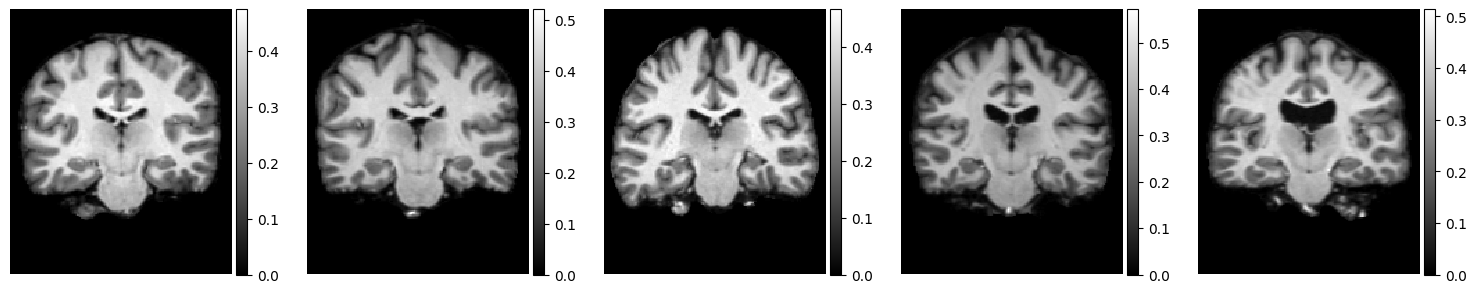

In [6]:
### To Do: plot 5 random sample from train data
nb_vis = 5
idx = np.random.randint(0, x_train.shape[0], [5,])
example_digits = [f for f in x_train[idx, ...]]

# visualize
ne.plot.slices(example_digits, cmaps=['gray'], do_colorbars=True);

In [7]:
# unet
nb_features = [
    [32, 32, 32, 32],         # encoder features
    [32, 32, 32, 32, 32, 16]  # decoder features
]
vxm_model = vxm.networks.VxmDense(vol_shape, nb_features, int_steps=0)

# losses and loss weights
losses = ['mse', vxm.losses.Grad('l2').loss]
loss_weights = [1, 0.01]


In [8]:
def vxm_data_generator(x_data, batch_size=32):
    """
    Generator that takes in data of size [N, H, W], and yields data for
    our custom vxm model. Note that we need to provide numpy data for each
    input, and each output.

    inputs:  moving [bs, H, W, 1], fixed image [bs, H, W, 1]
    outputs: moved image [bs, H, W, 1], zero-gradient [bs, H, W, 2]
    """

    # preliminary sizing
    vol_shape = x_data.shape[1:] # extract data shape
    ndims = len(vol_shape)

    # prepare a zero array the size of the deformation
    # we'll explain this below
    zero_phi = np.zeros([batch_size, *vol_shape, ndims])

    while True:
        # prepare inputs:
        # images need to be of the size [batch_size, H, W, 1]
        idx1 = np.random.randint(0, x_data.shape[0], size=batch_size)
        moving_images = x_data[idx1, ..., np.newaxis]
        idx2 = np.random.randint(0, x_data.shape[0], size=batch_size)
        fixed_images = x_data[idx2, ..., np.newaxis]
        inputs = [moving_images, fixed_images]

        # prepare outputs (the 'true' moved image):
        # of course, we don't have this, but we know we want to compare
        # the resulting moved image with the fixed image.
        # we also wish to penalize the deformation field.
        outputs = [fixed_images, zero_phi]

        yield (inputs, outputs)

In [9]:
# initializing train data generator
train_generator = vxm_data_generator(x_train, batch_size=8)
in_sample, out_sample = next(train_generator)



In [10]:
vxm_model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss=losses, loss_weights=loss_weights)

In [11]:
hist = vxm_model.fit_generator(train_generator, epochs=5, steps_per_epoch=5, verbose=2);

<ipython-input-11-2a3595386513>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = vxm_model.fit_generator(train_generator, epochs=5, steps_per_epoch=5, verbose=2);


Epoch 1/5
5/5 - 21s - loss: 0.0069 - vxm_dense_transformer_loss: 0.0069 - vxm_dense_flow_loss: 8.0088e-06 - 21s/epoch - 4s/step
Epoch 2/5
5/5 - 0s - loss: 0.0065 - vxm_dense_transformer_loss: 0.0065 - vxm_dense_flow_loss: 1.2249e-04 - 212ms/epoch - 42ms/step
Epoch 3/5
5/5 - 0s - loss: 0.0071 - vxm_dense_transformer_loss: 0.0071 - vxm_dense_flow_loss: 4.1108e-05 - 223ms/epoch - 45ms/step
Epoch 4/5
5/5 - 0s - loss: 0.0068 - vxm_dense_transformer_loss: 0.0068 - vxm_dense_flow_loss: 1.3751e-04 - 207ms/epoch - 41ms/step
Epoch 5/5
5/5 - 0s - loss: 0.0065 - vxm_dense_transformer_loss: 0.0065 - vxm_dense_flow_loss: 1.6556e-04 - 215ms/epoch - 43ms/step


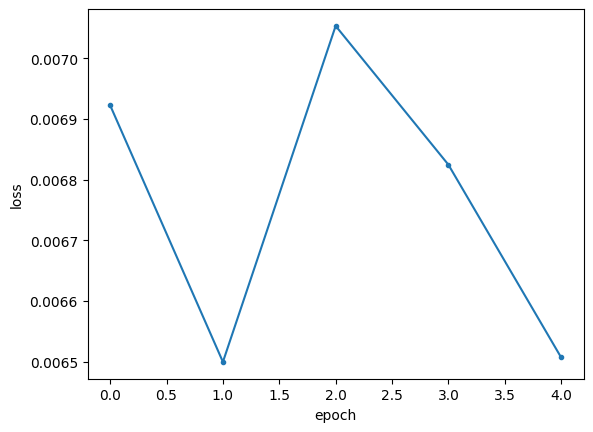

In [12]:
import matplotlib.pyplot as plt

def plot_history(hist, loss_name='loss'):
    # Simple function to plot training history.
    plt.figure()
    plt.plot(hist.epoch, hist.history[loss_name], '.-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

plot_history(hist)

Epoch 1/100


<ipython-input-13-35b4b14fc516>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = vxm_model.fit_generator(train_generator, epochs=100, steps_per_epoch=5, verbose=2);


5/5 - 0s - loss: 0.0061 - vxm_dense_transformer_loss: 0.0061 - vxm_dense_flow_loss: 5.8657e-04 - 241ms/epoch - 48ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0066 - vxm_dense_transformer_loss: 0.0066 - vxm_dense_flow_loss: 0.0026 - 214ms/epoch - 43ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0060 - vxm_dense_transformer_loss: 0.0060 - vxm_dense_flow_loss: 0.0065 - 236ms/epoch - 47ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0058 - vxm_dense_transformer_loss: 0.0056 - vxm_dense_flow_loss: 0.0160 - 220ms/epoch - 44ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0051 - vxm_dense_transformer_loss: 0.0047 - vxm_dense_flow_loss: 0.0377 - 216ms/epoch - 43ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0047 - vxm_dense_transformer_loss: 0.0043 - vxm_dense_flow_loss: 0.0396 - 225ms/epoch - 45ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0040 - vxm_dense_transformer_loss: 0.0035 - vxm_dense_flow_loss: 0.0516 - 209ms/epoch - 42ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0046 - vxm_dense_transformer_loss: 0.0040 - vxm_dense_flow_loss: 0.0550 - 

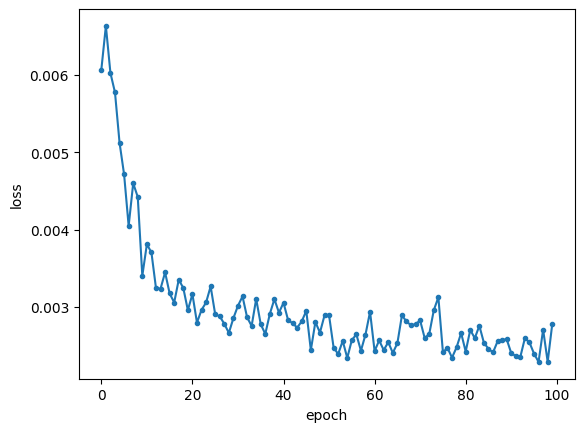

In [13]:
# TO DO: train model for 100 more epoches
hist = vxm_model.fit_generator(train_generator, epochs=100, steps_per_epoch=5, verbose=2);

plot_history(hist)

In [14]:
# create the validation data generator
val_generator = vxm_data_generator(x_val, batch_size = 1)
val_input, _ = next(val_generator)

In [15]:
# predicting output for validation data
val_pred = vxm_model.predict(val_input)

1/1 [==============================] - 1s 945ms/step


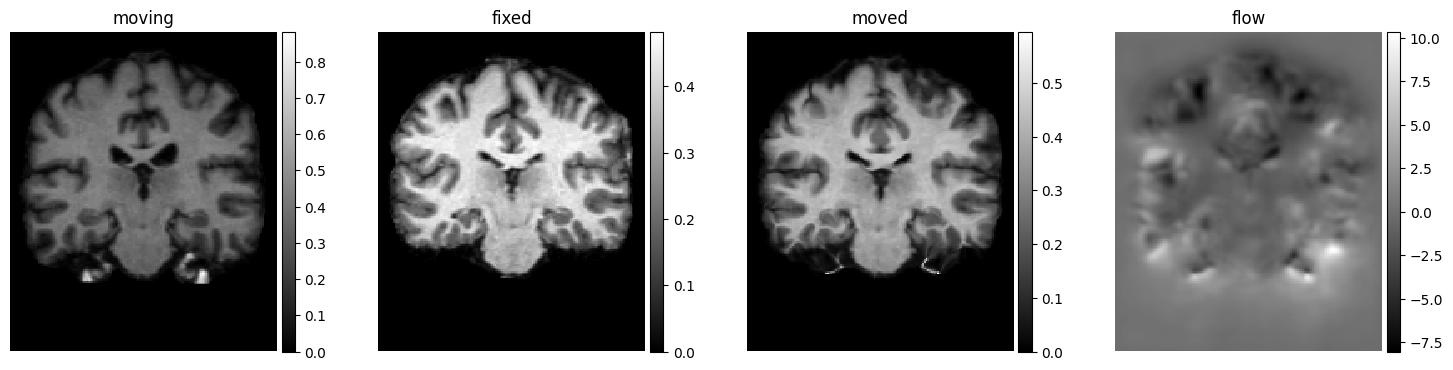

In [16]:
# visualize registration
images = [img[0, :, :, 0] for img in val_input + val_pred]
titles = ['moving', 'fixed', 'moved', 'flow']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

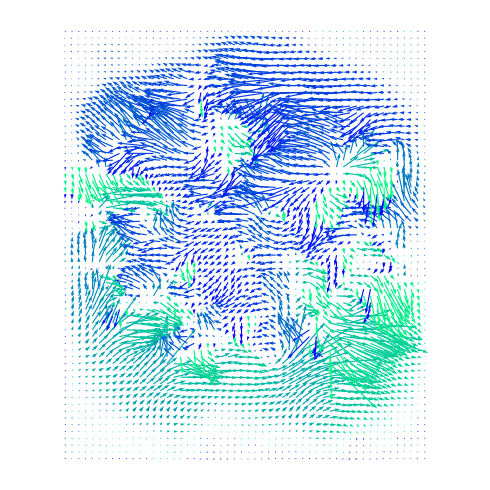

In [17]:
# visualize flow
flow = val_pred[1].squeeze()[::3,::3]
ne.plot.flow([flow], width=5);

<ipython-input-22-4e8b4f98e595>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = vxm_model.fit_generator(train_generator, epochs=100, steps_per_epoch=5, verbose=0);


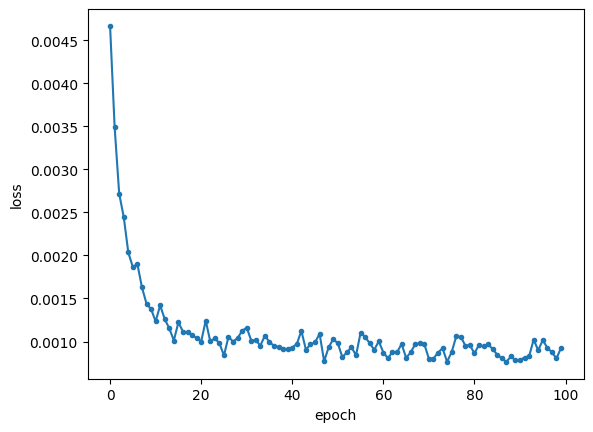

1/1 [==============================] - 1s 952ms/step


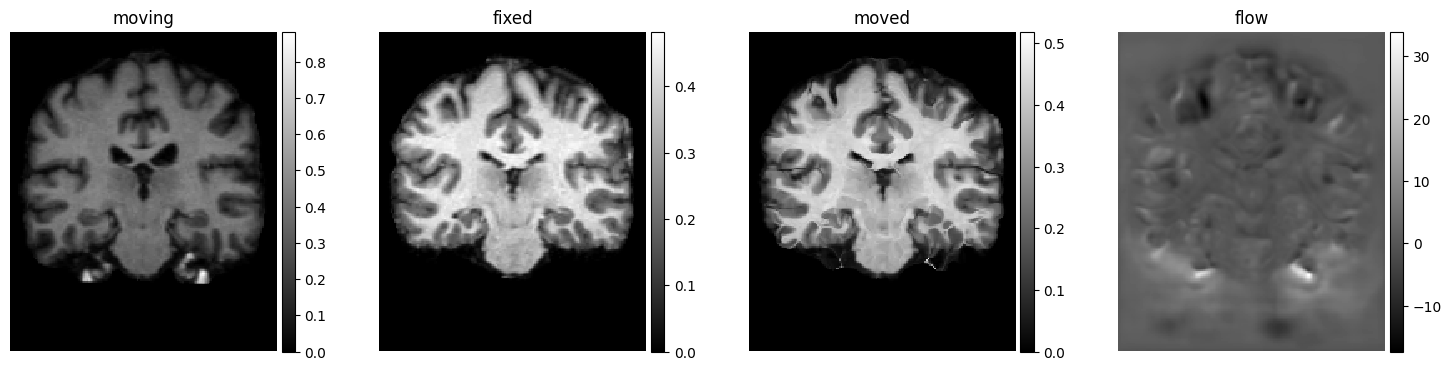

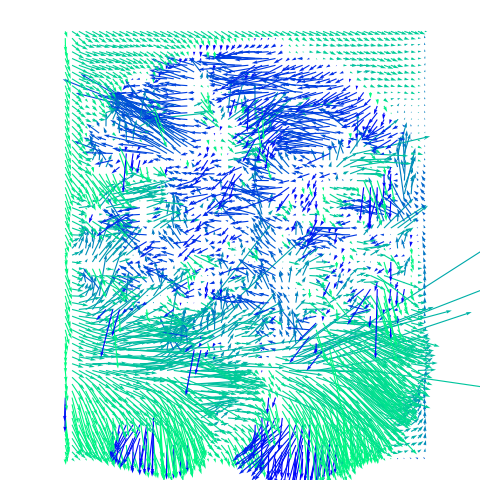

In [22]:
"""
 TO DO:

Train two models with different loss weights:

1. Model 1:
   - Loss weights: [1, 0.00001]
   - Train for 100 epochs

2. Model 2:
   - Loss weights: [1, 0.1]
   - Train for 100 epochs

After training, compare the results of each method to each other and analyze your findings.
"""

loss_weights = [1, 0.00001]

vxm_model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss=losses, loss_weights=loss_weights)

hist = vxm_model.fit_generator(train_generator, epochs=100, steps_per_epoch=5, verbose=0);
plot_history(hist)

# predicting output for validation data
val_pred = vxm_model.predict(val_input)

# visualize registration
images = [img[0, :, :, 0] for img in val_input + val_pred]
titles = ['moving', 'fixed', 'moved', 'flow']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

# visualize flow
flow = val_pred[1].squeeze()[::3,::3]
ne.plot.flow([flow], width=5);


<ipython-input-23-6c1425235b1d>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = vxm_model.fit_generator(train_generator, epochs=100, steps_per_epoch=5, verbose=0);


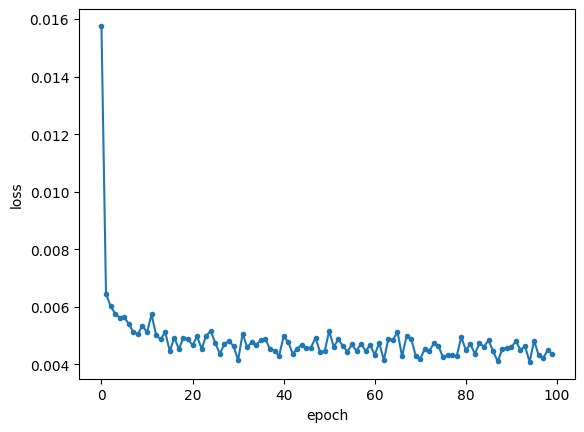

1/1 [==============================] - 0s 338ms/step


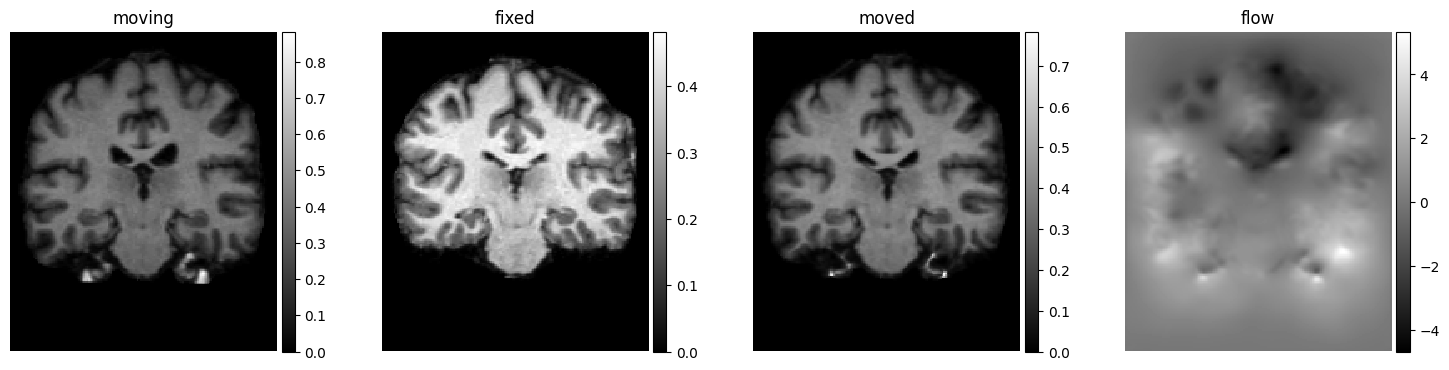

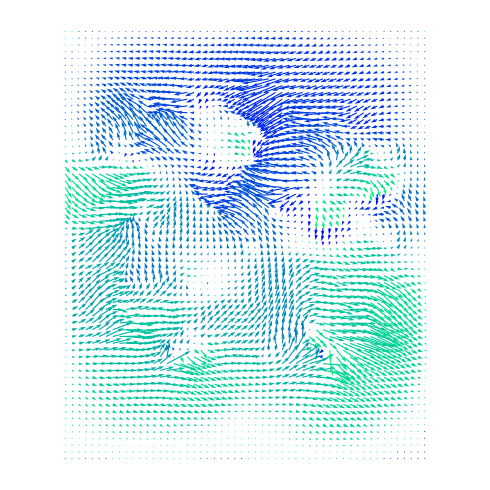

In [23]:
loss_weights = [1, 0.1]

vxm_model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss=losses, loss_weights=loss_weights)

hist = vxm_model.fit_generator(train_generator, epochs=100, steps_per_epoch=5, verbose=0);
plot_history(hist)

# predicting output for validation data
val_pred = vxm_model.predict(val_input)

# visualize registration
images = [img[0, :, :, 0] for img in val_input + val_pred]
titles = ['moving', 'fixed', 'moved', 'flow']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

# visualize flow
flow = val_pred[1].squeeze()[::3,::3]
ne.plot.flow([flow], width=5);

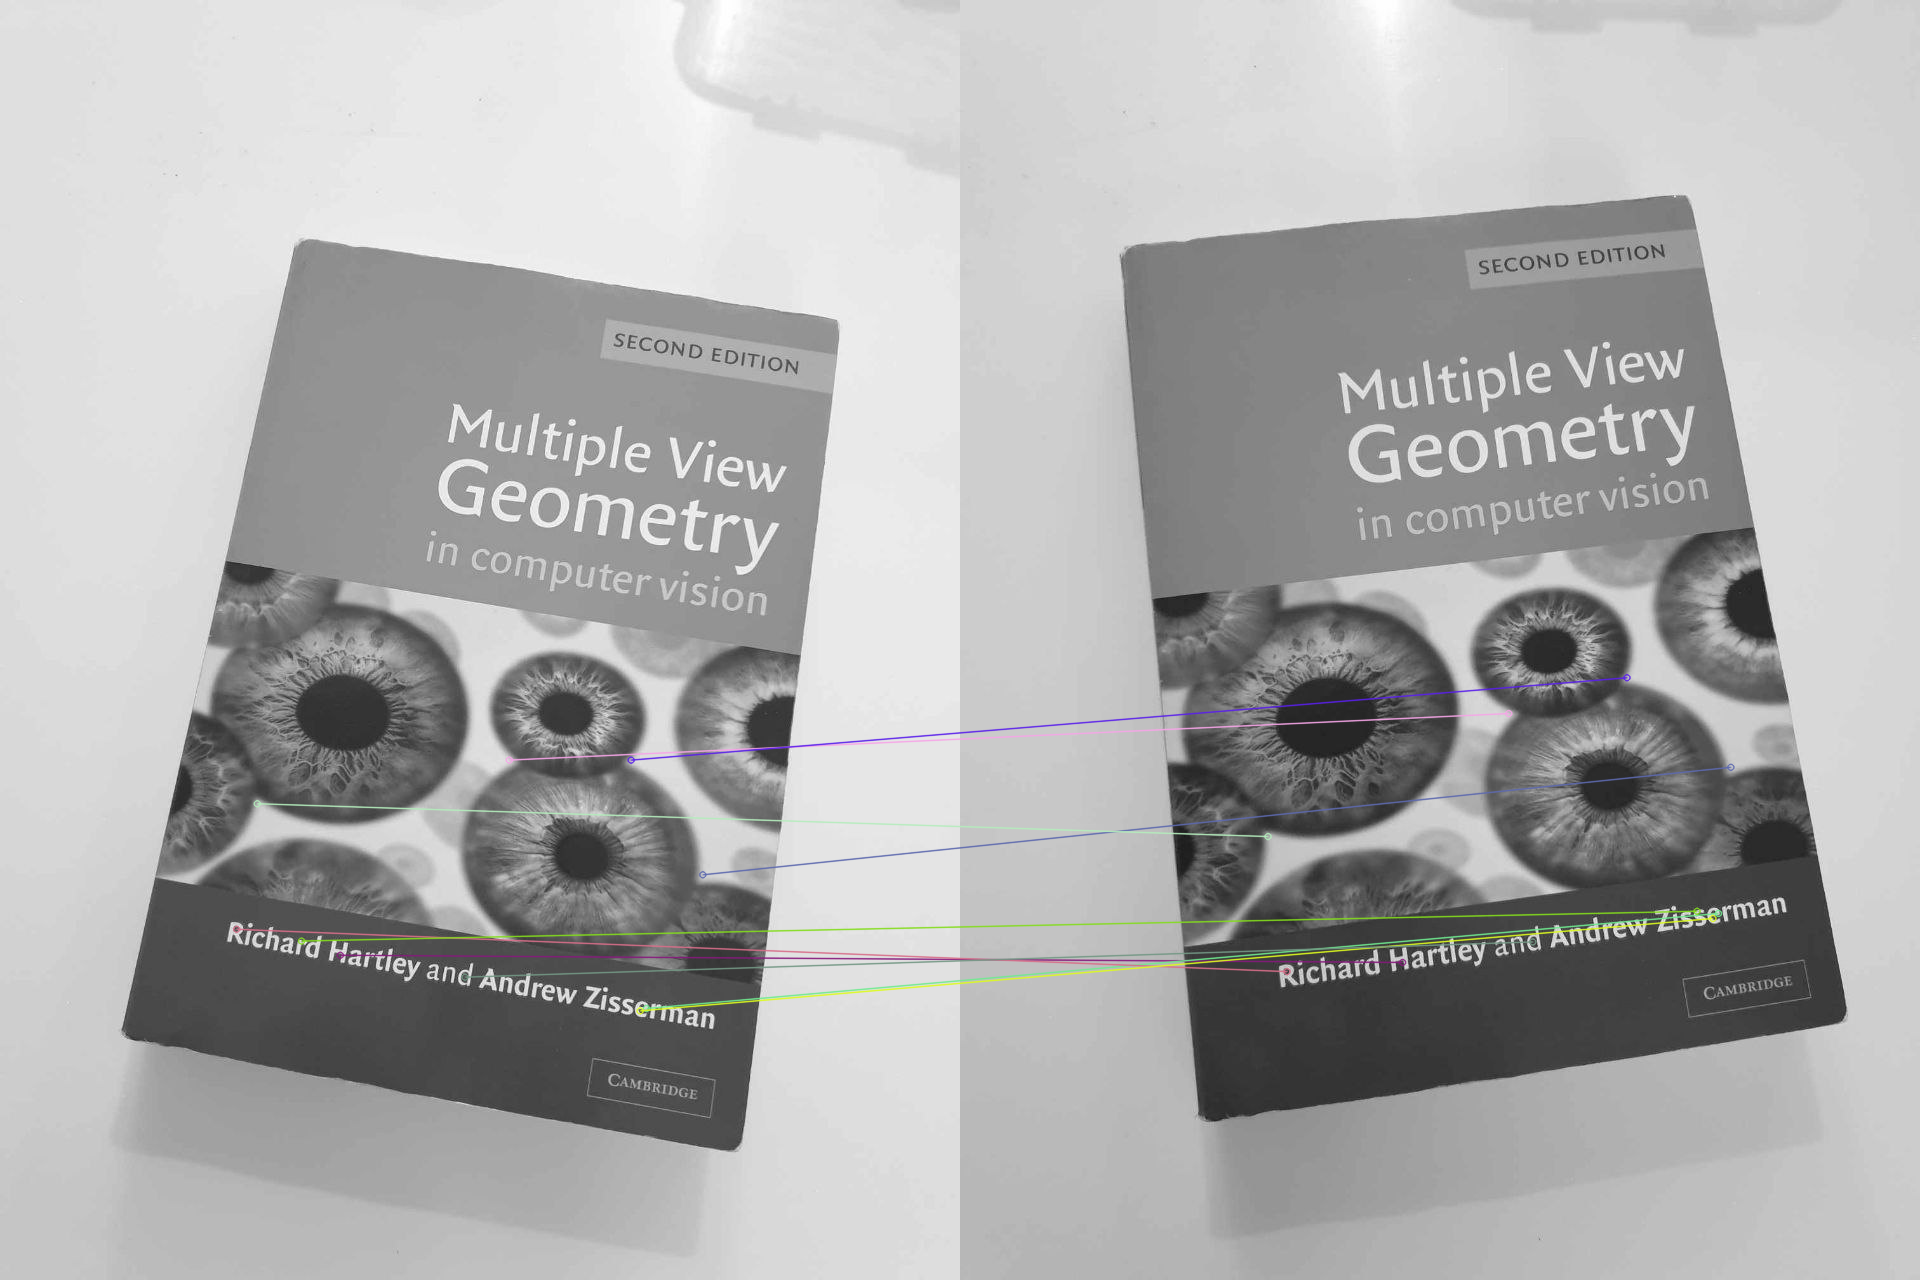

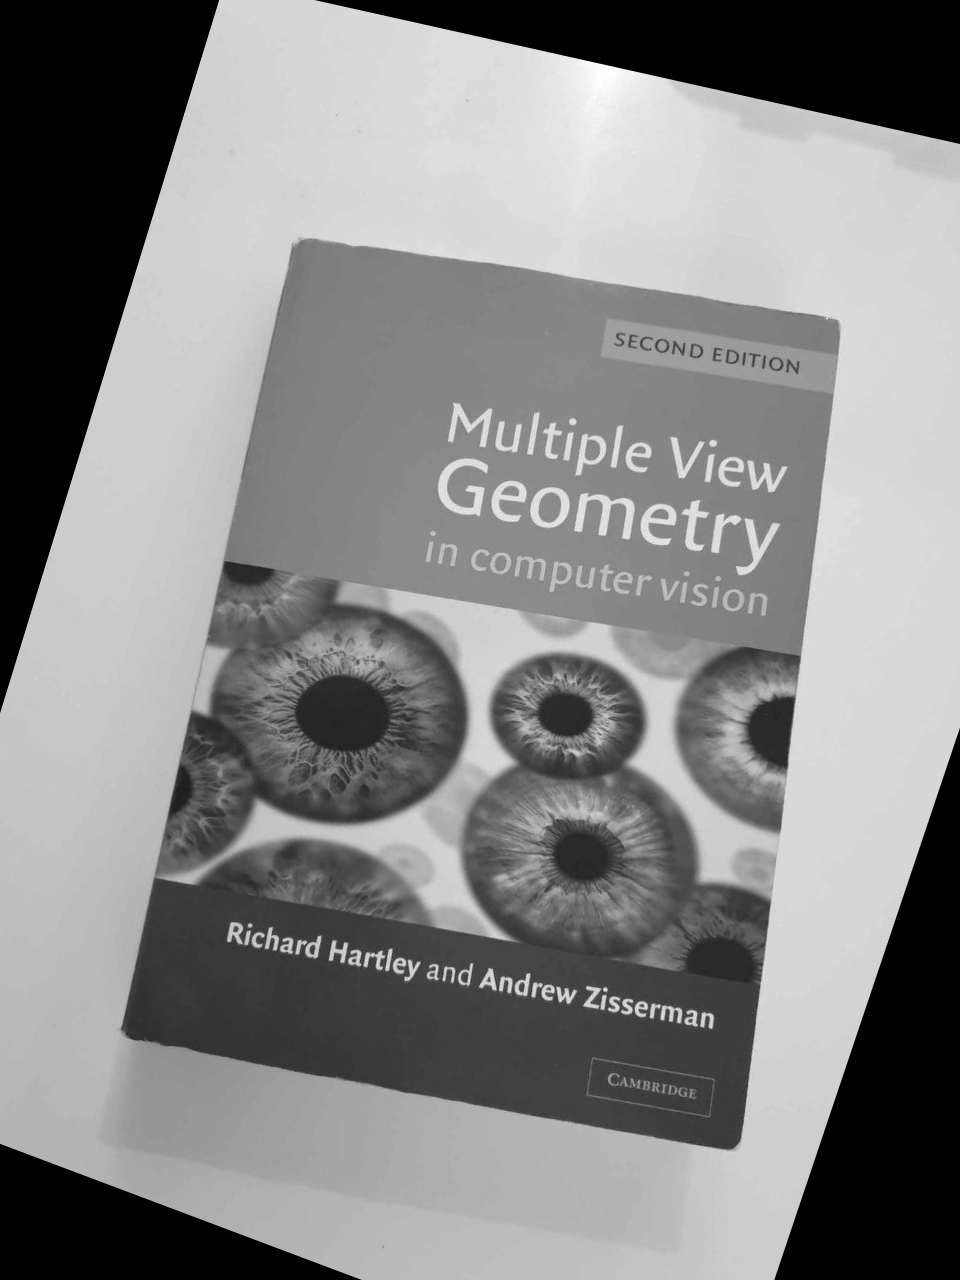

"\nExplanation\nimport cv2 and import numpy as np:\n\nImport the OpenCV and NumPy libraries.\nimg1 = cv2.imread('image1.jpg', 0) and img2 = cv2.imread('image2.jpg', 0):\n\nRead the images in grayscale. 0 flag specifies to read the image as grayscale.\norb = cv2.ORB_create():\n\nInitialize the ORB detector.\nkeypoints1, descriptors1 = orb.detectAndCompute(img1, None) and keypoints2, descriptors2 = orb.detectAndCompute(img2, None):\n\nDetect ORB keypoints and compute the descriptors for both images.\nbf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True):\n\nCreate a Brute Force Matcher object with Hamming distance as a measure and enable cross-checking.\nmatches = bf.match(descriptors1, descriptors2):\n\nMatch the descriptors from both images.\nmatches = sorted(matches, key=lambda x: x.distance):\n\nSort the matches based on the distance attribute. The lower the distance, the better the match.\nimg_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv

In [190]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


import cv2
import numpy as np

# Read the images to be aligned
img1 = cv2.imread('book1.jpg', 0)  # Reference
img2 = cv2.imread('book2.jpg', 0)  # Moving

# Detect ORB keypoints and descriptors in both images
orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Match descriptors using a brute-force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2_imshow(img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

# Use homography to warp img2 to the reference image
height, width = img1.shape
aligned_img = cv2.warpPerspective(img2, h, (width, height))

# Display aligned image
cv2_imshow(aligned_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


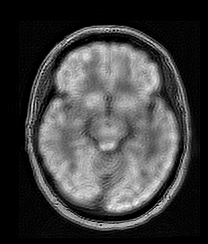

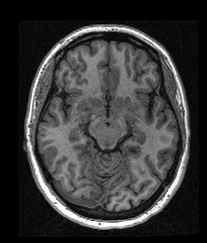

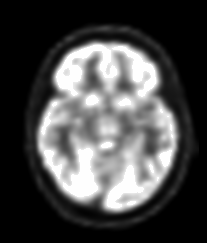


 Entropy of image1 : 6.201860817125071

 Entropy of image2 : 5.196484998209476

 Entropy of fused image : 6.953212051484201


In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def laplacian_pyramid(image, levels):
    dct_image = cv2.dct(np.float32(image))
    laplacian_pyramid = []
    image = np.float32(image)
    for i in range(levels):
        dct_image = cv2.dct(np.float32(image))

        image_compressed = cv2.idct(dct_image[:int(np.ceil(dct_image.shape[0]/2)), :int(np.ceil(dct_image.shape[1]/2))])
        image_compressed = cv2.pyrUp(image_compressed)
        if i==0:
          laplacian_pyramid.append(image_compressed)
        pad_size = np.array(image_compressed.shape) - np.array(image.shape)
        image = cv2.subtract(cv2.copyMakeBorder(image, pad_size[0], 0, pad_size[1], 0, borderType=cv2.BORDER_CONSTANT, value=0),image_compressed, dtype=cv2.CV_64F)
        laplacian_pyramid.append(image)

    return laplacian_pyramid

def fuse_laplacian_pyramids(pyr1, pyr2):
    fused_pyramid = []
    for l1, l2 in zip(pyr1, pyr2):
        fused_layer = (l1+l2)/2  # average fusion rule
        fused_pyramid.append(fused_layer)
    return fused_pyramid

def reconstruct_from_pyramid(pyramid):
    image = pyramid[-1]
    for i in range(len(pyramid) - 2, -1, -1):
        pad_size = np.array(image.shape) - np.array(pyramid[i].shape)
        image = cv2.add(image, cv2.copyMakeBorder(pyramid[i], pad_size[0], 0, pad_size[1], 0, borderType=cv2.BORDER_CONSTANT, value=0), dtype=cv2.CV_64F)
    return image

def laplacian_pyramid_fusion(image1, image2, levels=3):
    # Construct Laplacian pyramids for both images
    lp1 = laplacian_pyramid(image1, levels)
    lp2 = laplacian_pyramid(image2, levels)

    # Fuse the Laplacian pyramids
    fused_pyramid = fuse_laplacian_pyramids(lp1, lp2)

    # Reconstruct the fused image from the fused pyramid
    fused_image = reconstruct_from_pyramid(fused_pyramid)

    return fused_image


def calculate_entropy(image):
    # Compute the histogram
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))

    # Normalize the histogram
    histogram = histogram / histogram.sum()

    # Compute the entropy
    entropy = -np.sum([p * np.log2(p) for p in histogram if p > 0])

    return entropy


# Load images
image1 = cv2.imread('MRI.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('PET.png', cv2.IMREAD_GRAYSCALE)

# Perform Laplacian pyramid fusion
fused_image = laplacian_pyramid_fusion(image1, image2)


cv2_imshow(fused_image)
cv2_imshow(image1)
cv2_imshow(image2)

print(f"\n Entropy of image1 : {calculate_entropy(image1)}")
print(f"\n Entropy of image2 : {calculate_entropy(image2)}")
print(f"\n Entropy of fused image : {calculate_entropy(fused_image)}")